In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def tryconvert(value, default, *types):
    for t in types:
        try:
            return t(value)
        except (ValueError, TypeError):
            continue
    return default

In [2]:
p2p_acc = pd.read_csv("data/LC/Lending_Club_Accepted_2014_2018.csv")
p2p_rej = pd.read_csv("data/LC/Lending_Club_Rejected_2014_2018.csv")

/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_4005/3470390931.py:1: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  p2p_acc = pd.read_csv("data/LC/Lending_Club_Accepted_2014_2018.csv")


In [180]:
df = p2p_acc[['zip_code', 'funded_amnt', 'issue_d']]
df['zip_code'] = df['zip_code'].apply(lambda x: tryconvert(str(x)[:3], 0, int))
df['issue_d'] = pd.to_datetime(df['issue_d']).dt.to_period('Q')
df = df.groupby(['zip_code', 'issue_d']).sum().reset_index()
df

/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_4005/4219156552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zip_code'] = df['zip_code'].apply(lambda x: tryconvert(str(x)[:3], 0, int))
/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_4005/4219156552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_d'] = pd.to_datetime(df['issue_d']).dt.to_period('Q')


,zip_code,issue_d,funded_amnt
0,0,2017Q1,5600.0
1,7,2014Q3,18000.0
2,7,2014Q4,17500.0
3,7,2015Q3,20000.0
4,7,2016Q1,14000.0
...,...,...,...
17256,999,2017Q4,58000.0
17257,999,2018Q1,164000.0
17258,999,2018Q2,100650.0
17259,999,2018Q3,173000.0


In [4]:
demog = pd.read_csv('data/demographic_cleaned.csv')
# demog = demog.groupby(['zip3', 'YEAR', 'MONTH']).nth(0).reset_index()

In [277]:
nev_zip = set([i for i in range(890, 900)])
# demog = demog[demog['zip3'].isin(nev_zip)]

In [278]:
black_zip = set(demog.sort_values(by='is_black')[-50:]['zip3'])
# att_zip = set([i for i in range(880, 910)])

In [279]:
zip_ = nev_zip #black_zip
zip_

{890, 891, 892, 893, 894, 895, 896, 897, 898, 899}

In [280]:
mask = df['zip_code'].isin(zip_)

In [281]:
df_test = df[mask]
df_control = df[~mask]

In [282]:
pop_by_zip = pd.read_csv("data/population_by_zip_2010.csv")
pop_by_zip = pop_by_zip.groupby([pop_by_zip['zipcode'] // 100])['population'].sum()

In [283]:
# df_test = df_test.merge(pop_by_zip, left_on='zip_code', right_on='zipcode')

In [284]:
# df_test = df_test[df_test['population'] > 0]

In [285]:
df_test = df_test.groupby('issue_d').sum()
df_control = df_control.groupby('issue_d').sum()

In [286]:
import numpy as np
df_test['funded_amnt'] = np.log(df_test['funded_amnt'])
df_control['funded_amnt'] = np.log(df_control['funded_amnt'])

In [287]:
df_test['funded_amnt'] = df_test['funded_amnt'] / df_test.iloc[14, :]['funded_amnt']
df_control['funded_amnt'] = df_control['funded_amnt'] / df_control.iloc[14, :]['funded_amnt']

In [288]:
# df_test.plot(y='funded_amnt', use_index=True)

In [289]:
# df_control.plot(y='funded_amnt', use_index=True)

In [290]:
df_ = pd.merge(df_test, df_control, left_index=True, right_index=True)


<AxesSubplot:xlabel='issue_d'>

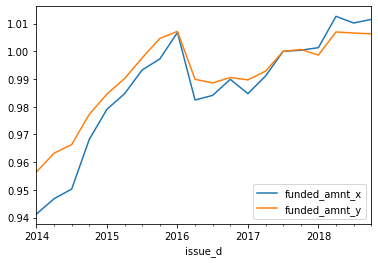

In [291]:
df_.plot(y=['funded_amnt_x', 'funded_amnt_y'], use_index=True)

In [292]:
len(black_zip)

5

In [293]:
df_test

,zip_code,funded_amnt
issue_d,,
2014Q1,6258,0.941310
2014Q2,6258,0.946816
2014Q3,6258,0.950328
2014Q4,6258,0.968263
2015Q1,6258,0.979093
2015Q2,6258,0.984699
2015Q3,7150,0.993281
2015Q4,6258,0.997255
2016Q1,6258,1.006819
